# Airplane Crashes (August 1918- September 2022) - Beginner Friendly EDA

*After scraping the Aviation accident rate by year and fatalities by year data off the Bureau of Aircraft Accidents Archives - B3A (a Geneva-based NGO) website to an Excel spreadsheet through Web Query, merged data using INDEX/MATCH functions.

According to [B3A website](https://www.baaa-acro.com/about):

*The B3A compiles statistics on aviation accidents where an aircraft suffered such damage that it is not in a position to be used anymore and that it is removed from service (withdrawn from use, written off). The NGO only considers crashes involving an aircraft certified to carry at least 6 people, crew included (except for the early years), excluding helicopters, balloons, hot air balloons, airships, gliders, fighters, and all other aircraft which does not correspond to the criterias mentioned here above. In military aviation, only are considered accidents involving aircraft intended for troop transport, reconnaissance, surveillance, medium and heavy bomber and logistical support.

**A Reminder > According to The Week's [Fact check: is flying safe?](https://www.theweek.co.uk/97155/fact-check-is-flying-safe)

***You are far more likely to die driving to the airport than you are to be involved in a deadly plane accident, the evidence suggests. A Harvard University study found that the odds that your airplane will crash are one in 1.2 million, and the odds of dying from a crash are one in 11 million.

## Let's start with importing essential libraries.

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

## Getting familiar with data

In [29]:
df =  pd.read_csv('C:/Users/User/Downloads/Aircrash_Sencer.csv')

df.head()


,Year,Nb of Crashes,Fatalities
0,1918,25,29
1,1919,83,50
2,1920,127,77
3,1921,138,78
4,1922,106,105


In [3]:
df.tail()

,Year,Nb of Crashes,Fatalities
100,2018,131,1039
101,2019,145,588
102,2020,113,480
103,2021,113,414
104,2022,61,284


In [4]:
df.shape

(105, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Year           105 non-null    int64
 1   Nb of Crashes  105 non-null    int64
 2   Fatalities     105 non-null    int64
dtypes: int64(3)
memory usage: 2.6 KB


In [17]:
df.duplicated().value_counts() #See if there are any dublicated

False    105
dtype: int64

In [6]:
df.isnull().sum() #Calculating missing values in rows

Year             0
Nb of Crashes    0
Fatalities       0
dtype: int64

In [7]:
(df.astype(str) == 'nan').any()

Year             False
Nb of Crashes    False
Fatalities       False
dtype: bool

*Not a single missing value!

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,105.0,1969.990476,30.454725,1918.0,1944.0,1970.0,1996.0,2022.0
Nb of Crashes,105.0,281.228571,151.297545,25.0,208.0,269.0,332.0,949.0
Fatalities,105.0,1534.914286,999.675275,29.0,647.0,1585.0,2220.0,4700.0


In [9]:
total = df.iloc[:, 1:3].sum()
print(total)

Nb of Crashes     29529
Fatalities       161166
dtype: int64


**As of the data extraction date of September 9, 2022, the total fatalities due to aviation accidents since 1918 is 161,166. The total number of incidents is 29,529

In [ ]:
#Let's rename Year, Nb of Crashes and Fatalities columns with the year, incidents, fatalities

In [10]:
df.columns = ["year", "incidents", "fatalities"]
df.columns

Index(['year', 'incidents', 'fatalities'], dtype='object')

## Data Visualization

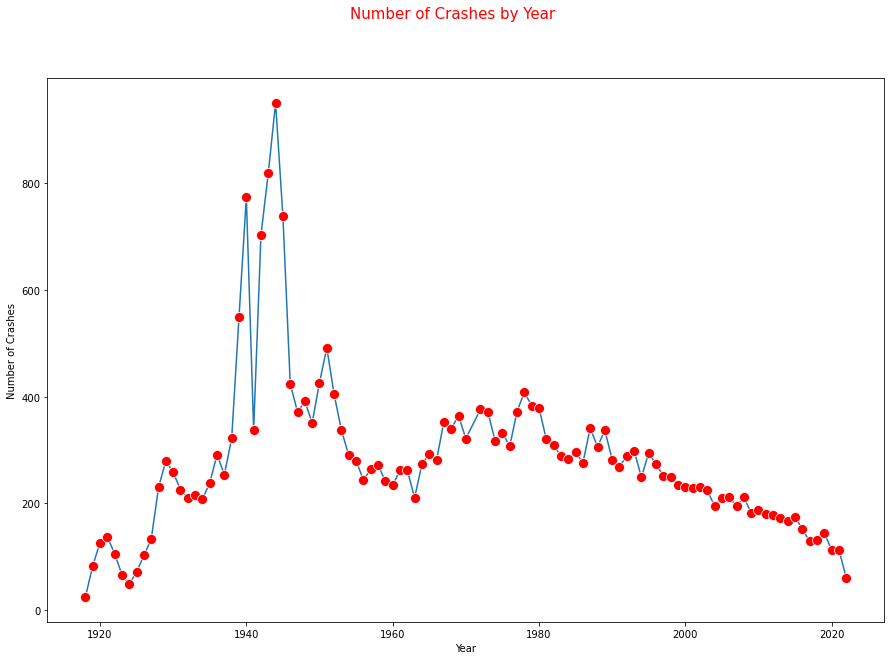

In [12]:
plt.figure(figsize = (15,10))
g = sns.lineplot(x = df.year, y = df.incidents,
                 marker = "o", markerfacecolor = "red", markersize = 10)

plt.ylabel("Number of Crashes")
plt.xlabel("Year")
g.figure.suptitle("Number of Crashes by Year", fontsize = 15, color = "red");


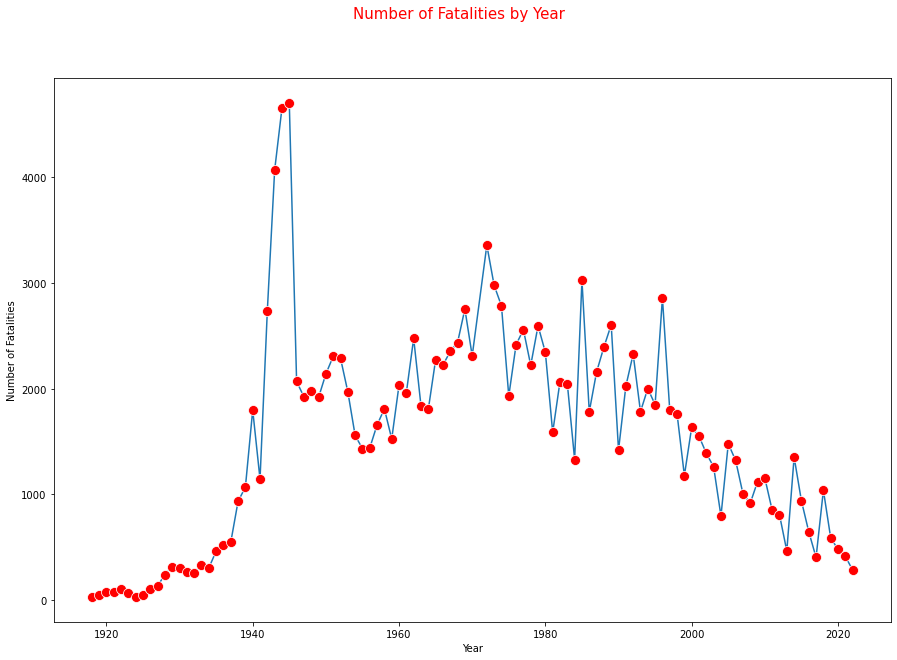

In [13]:
plt.figure(figsize = (15,10))
g = sns.lineplot(x = df.year, y = df.fatalities,
                 marker = "o", markerfacecolor = "red", markersize = 10)

plt.ylabel("Number of Fatalities")
plt.xlabel("Year")
g.figure.suptitle("Number of Fatalities by Year", fontsize = 15, color = "red");


In [14]:
df['Rate'] = df['fatalities'] / df['incidents']
df.Rate

0      1.160000
1      0.602410
2      0.606299
3      0.565217
4      0.990566
         ...   
100    7.931298
101    4.055172
102    4.247788
103    3.663717
104    4.655738
Name: Rate, Length: 105, dtype: float64

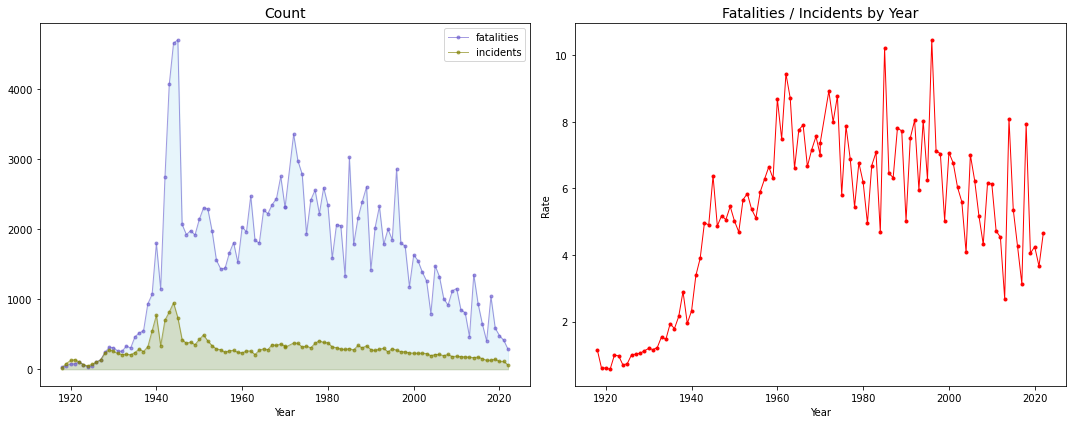

In [15]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.fill_between(df.year, 'fatalities', data=df, color="skyblue", alpha=0.2)
plt.plot(df.year, 'fatalities', data=df, marker = ".", color="Slateblue", alpha=0.6, linewidth=1)
plt.fill_between(df.year, 'incidents', data=df, color="olive", alpha=0.2)
plt.plot(df.year, 'incidents', data=df, color="olive", marker = ".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.title('Count', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(df.year, 'Rate', data=df, marker = ".", color = 'red', linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Rate', fontsize=10)
plt.title('Fatalities / Incidents by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()
